import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import os
os.chdir(r'/Users/manick/Python Training/dataset')
infile=pd.read_csv('ClusterData.csv')
infile.head()

In [3]:
import pandas as pd 
import numpy as np from sklearn.cluster 
import KMeans 
import os os.chdir(r'/Users/manick/Python Training/dataset') 

infile=pd.read_csv('ClusterData.csv') 
infile.head()



SyntaxError: invalid syntax (<ipython-input-3-02632539df06>, line 2)

In [69]:
kmc=KMeans(n_clusters=3)
kmc.fit(infile)
print(kmc.labels_)

[1 1 1 1 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 0
 0 0 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 2 2 2 2 2 2 0 0 0 1 1 1 1 1 1 2 2 2 0 0 0 0 0 0 0]


In [70]:
outfile=infile.copy()
outfile['ClusterNo'] = kmc.labels_
outfile.tail(2)
outfile.pivot_table(index='ClusterNo',aggfunc='mean')

,DailySteps,age,height,weight
ClusterNo,,,,
0,12399.344828,47.137931,162.103448,74.034483
1,2996.142857,40.571429,173.600000,66.057143
2,7951.694444,42.305556,171.777778,68.222222


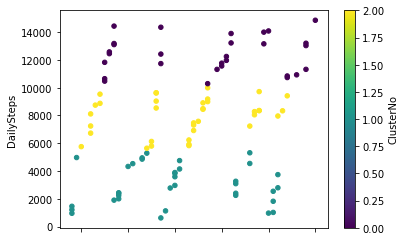

In [71]:
%matplotlib inline
outfile.plot.scatter(x='age', y='DailySteps',c='ClusterNo', colormap='viridis')

In [72]:
from sklearn.preprocessing import MinMaxScaler
scalerfun= MinMaxScaler()
scaled_data = scalerfun.fit_transform(infile)

print(infile.tail(2),'\n',scaled_data[-2:])

kmc1 = KMeans (n_clusters=5)
kmc1.fit(scaled_data)
outfile = infile.copy()
outfile['ClusterNo']=kmc1.labels_
#kmc1.labels_
outfile.pivot_table(index='ClusterNo',aggfunc='mean')

    age  weight  height  DailySteps
98   68     100     122       13200
99   70     100     122       14855 
 [[0.96153846 1.         0.         0.88373727]
 [1.         1.         0.         1.        ]]


,DailySteps,age,height,weight
ClusterNo,,,,
0,3450.961538,31.230769,192.192308,54.538462
1,10809.722222,62.388889,131.444444,92.166667
2,9193.000000,46.727273,164.409091,74.909091
3,3149.384615,57.461538,140.769231,86.230769
4,10629.476190,28.571429,197.666667,50.904762


In [73]:
type(scaled_data)

numpy.ndarray

In [74]:
#Understanding oversampling
#target y = default (3%) or pay (97%)
#train (defualt 30,pay 970)-1000
#train - 30 default, 60 pay

<function matplotlib.pyplot.bone()>

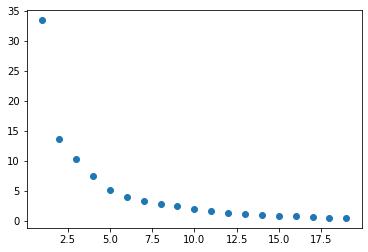

In [75]:
cldist=[]
for i in range(1,20):
    kmc1 = KMeans (n_clusters=i)
    kmc1.fit(scaled_data)
    cldist.append(kmc1.inertia_)

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x=range(1,20),y=cldist)
# Scree or elbow
plt.bone

In [76]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
import os
os.chdir(r'/Users/manick/Python Training/dataset')
infile=pd.read_csv('europeanfoods.csv')

In [77]:
scalefun=MinMaxScaler()
scaled_data = scalefun.fit_transform(infile.drop(columns='name'))

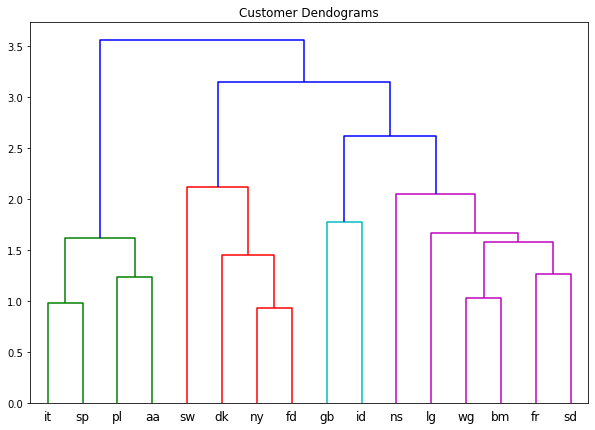

In [78]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure (figsize=(10,7))
plt.title("Customer Dendograms")
dend=shc.dendrogram(shc.linkage(scaled_data, method='ward'), 
                   labels=list(infile['name']))



In [79]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,
                                  affinity='euclidean',
                                  linkage='ward')
clusterno = cluster.fit_predict(scaled_data)
outdf = infile.copy()
outdf['ClusterNo'] = clusterno
pd.crosstab(outdf['name'],outdf['ClusterNo']).T

outdf.pivot_table(index='ClusterNo',aggfunc='mean')

,butter,crispbread,fresh apples,fresh oranges,frozen fish,frozen vegetables,garlic clove,ground coffee,instant coffee,instant potatoes,margarine,olive oil,packaged biscuits,packaged soup,shop jam,sugarless sweets,tea bags,tinned fruit,tinned soup,yogurt
ClusterNo,,,,,,,,,,,,,,,,,,,,
0,79.750000,63.250000,62.000000,69.750000,38.250000,28.50,11.5,95.750000,14.75,18.75,77.750000,30.75,48.000000,38.250000,56.750000,24.750000,88.0,39.750000,18.50,3.750000
1,96.000000,18.500000,66.500000,60.000000,12.500000,13.50,8.0,20.000000,69.00,9.50,59.500000,44.00,85.500000,65.000000,90.000000,16.500000,99.0,67.500000,47.00,7.000000
2,79.333333,17.166667,81.833333,81.333333,18.333333,15.00,51.5,89.666667,54.00,14.00,75.166667,58.50,63.166667,58.333333,55.833333,19.833333,78.0,52.666667,20.00,39.833333
3,56.500000,12.750000,49.250000,60.250000,15.500000,5.75,76.5,69.750000,26.75,6.50,56.250000,76.25,42.000000,37.750000,35.250000,4.750000,59.5,15.250000,1.75,10.000000
